In [1]:
import pandas as pd
import numpy as np

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import datasets, svm
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

In [3]:
df_train = pd.read_csv("wine_train.csv")
df_test = pd.read_csv("wine_test.csv")

In [4]:
df_train['quality'].value_counts()

6    2410
5    1793
7     910
4     184
8     170
3      25
9       5
Name: quality, dtype: int64

In [5]:
def remapping_target_class(base_class):
    mapping = {
        3 : 0,
        4 : 1,
        5 : 2,
        6 : 3,
        7 : 4,
        8 : 5,
        9 : 6
    }
    return mapping[base_class]



def restore_target_class(classes):
    target_map=[3,4,5,6,7,8,9]
    return target_map[classes]

In [6]:
X = df_train[list(set(df_train.columns)-set(['quality']))]
X = pd.get_dummies(X, columns=["type"])

In [7]:
ss = StandardScaler()
df_train = pd.get_dummies(df_train, columns=["type"])
df_scaled_train = pd.DataFrame(columns=df_train.columns,data=ss.fit_transform(df_train))
y = df_train['quality']

In [8]:
df_scaled_train

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,type_R,type_W
0,-1.092222,-0.976016,0.358838,-0.910036,-0.565949,0.031019,-0.341061,-1.748823,-0.366019,-0.349098,1.258958,0.201665,-0.578681,0.578681
1,-1.398817,2.993529,-1.651826,-0.889085,-0.282608,-0.979255,-0.393802,-0.764032,2.187686,2.133253,2.095005,1.343323,1.728069,-1.728069
2,0.134160,1.629945,-2.137159,-0.721482,0.510744,-0.979255,-1.360722,0.914739,1.627117,0.791442,-0.580347,-0.939994,1.728069,-1.728069
3,-0.172435,-0.188167,-0.403828,0.409843,0.369074,-0.137360,0.784082,0.227368,-0.552876,-0.483279,-0.580347,0.201665,-0.578681,0.578681
4,0.517404,0.054248,0.289504,-0.805283,-0.509280,-1.091508,0.151189,-0.631846,0.194550,-0.349098,0.422910,-0.939994,-0.578681,0.578681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5492,-0.172435,-0.976016,0.358838,-0.826234,-0.367610,-0.810876,-0.200418,-0.843344,-0.241448,-0.214917,0.255701,-0.939994,-0.578681,0.578681
5493,-0.325733,0.660285,0.289504,-0.092968,-0.650951,-0.137360,0.713760,-1.226686,-0.677447,-0.885823,1.593377,1.343323,-0.578681,0.578681
5494,1.973732,0.660285,0.428171,-0.616729,0.709083,0.199398,-0.868472,0.842036,-0.428305,0.321808,-0.580347,-0.939994,1.728069,-1.728069
5495,0.900648,-0.733601,-0.126495,-0.868135,-0.509280,0.816788,0.116028,-0.968922,-0.552876,0.053445,0.255701,1.343323,-0.578681,0.578681


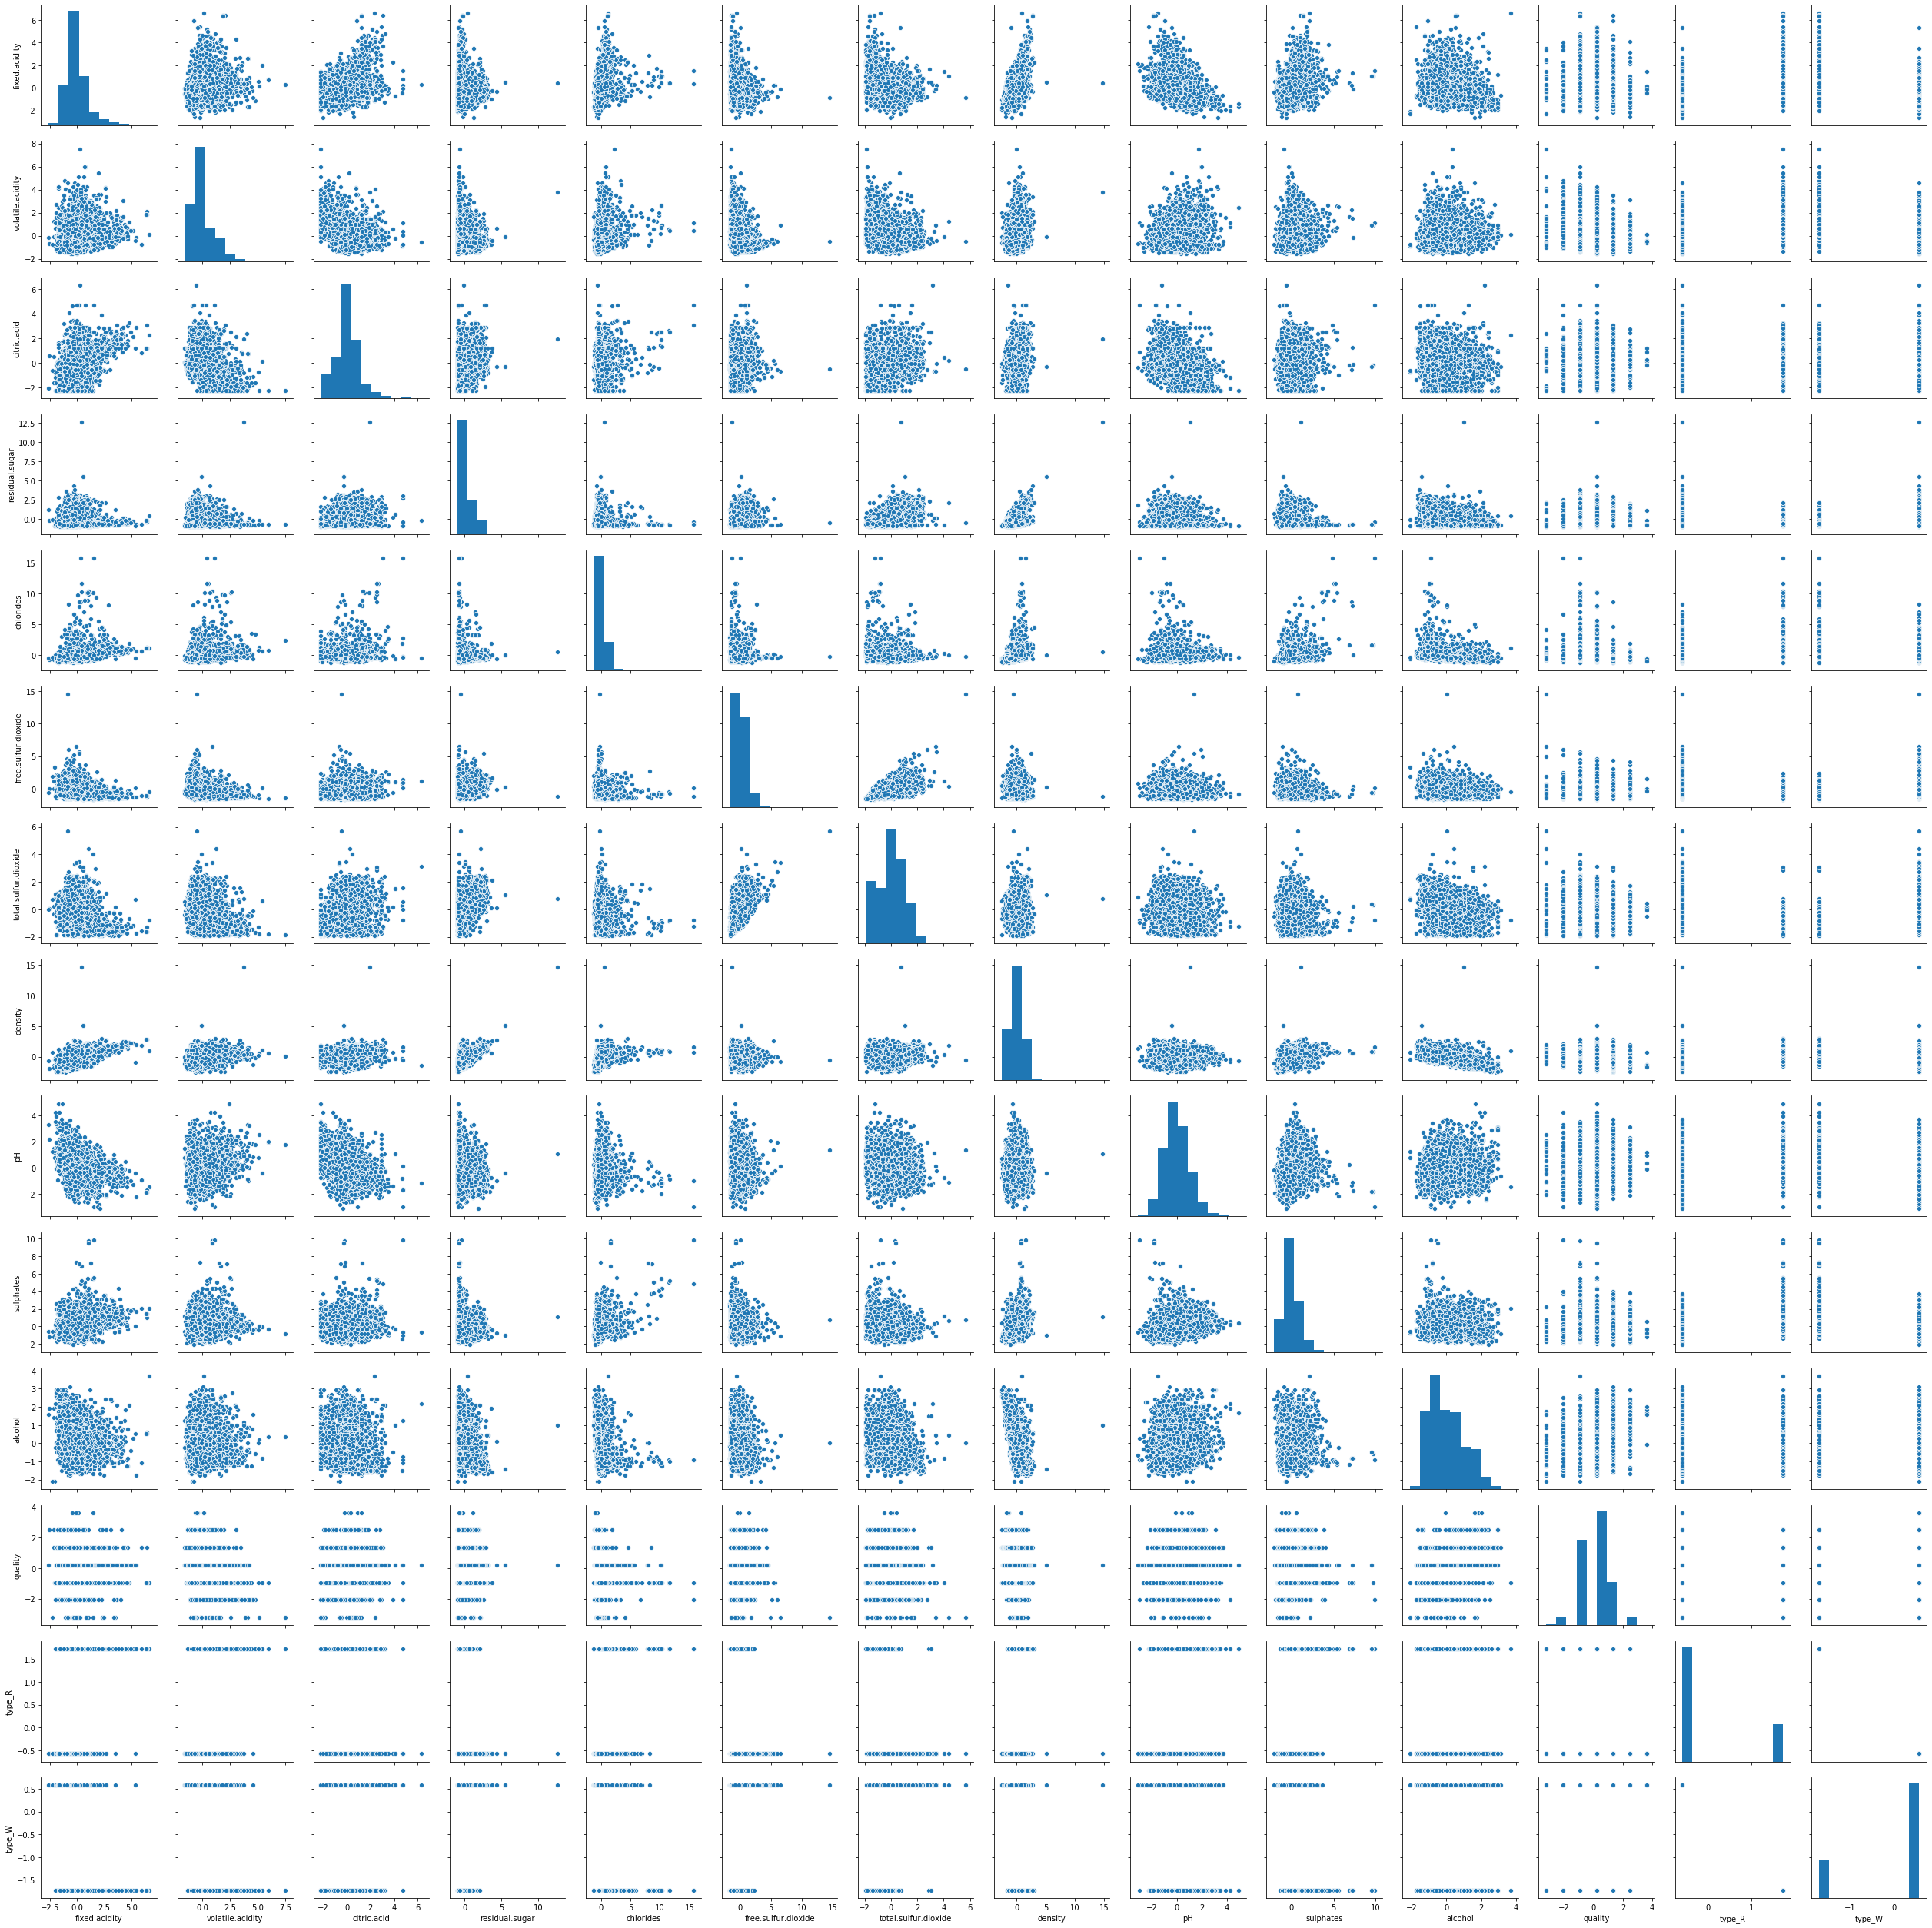

In [9]:
sns.pairplot(df_scaled_train)

In [10]:
corr_matrix = df_scaled_train.corr()
corr_matrix

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,type_R,type_W
fixed.acidity,1.000000,0.211976,0.329735,-0.114593,0.298023,-0.285458,-0.333662,0.457178,-0.253487,0.298304,-0.096197,-0.077304,0.488026,-0.488026
volatile.acidity,0.211976,1.000000,-0.380507,-0.192181,0.378689,-0.351014,-0.414332,0.275989,0.272033,0.227065,-0.041854,-0.266449,0.654086,-0.654086
citric.acid,0.329735,-0.380507,1.000000,0.137761,0.037267,0.133508,0.197625,0.094894,-0.338423,0.059982,-0.010692,0.080977,-0.188765,0.188765
residual.sugar,-0.114593,-0.192181,0.137761,1.000000,-0.128805,0.398788,0.496118,0.552194,-0.263483,-0.184067,-0.361551,-0.041976,-0.350524,0.350524
chlorides,0.298023,0.378689,0.037267,-0.128805,1.000000,-0.203369,-0.284234,0.364768,0.051870,0.411978,-0.256726,-0.200778,0.516986,-0.516986
free.sulfur.dioxide,-0.285458,-0.351014,0.133508,0.398788,-0.203369,1.000000,0.723230,0.018037,-0.147531,-0.193745,-0.175665,0.056353,-0.477423,0.477423
total.sulfur.dioxide,-0.333662,-0.414332,0.197625,0.496118,-0.284234,0.723230,1.000000,0.029238,-0.232807,-0.273815,-0.258875,-0.037969,-0.700843,0.700843
density,0.457178,0.275989,0.094894,0.552194,0.364768,0.018037,0.029238,1.000000,0.018089,0.263402,-0.687985,-0.313193,0.392087,-0.392087
pH,-0.253487,0.272033,-0.338423,-0.263483,0.051870,-0.147531,-0.232807,0.018089,1.000000,0.186505,0.113073,0.009871,0.332188,-0.332188
sulphates,0.298304,0.227065,0.059982,-0.184067,0.411978,-0.193745,-0.273815,0.263402,0.186505,1.000000,-0.013821,0.032083,0.487272,-0.487272


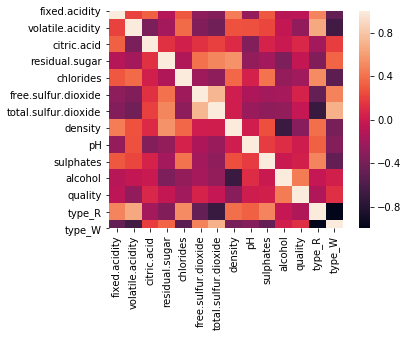

In [11]:
sns.heatmap(corr_matrix,
            square=True,
            xticklabels=corr_matrix.columns.values,
            yticklabels=corr_matrix.columns.values)

In [12]:
corr_y = pd.DataFrame({"features":df_scaled_train.columns,"corr_y":corr_matrix["quality"]},index=None)
corr_y = corr_y.reset_index(drop=True)
corr_y.style.background_gradient()

,features,corr_y
0,fixed.acidity,-0.0773037
1,volatile.acidity,-0.266449
2,citric.acid,0.080977
3,residual.sugar,-0.0419763
4,chlorides,-0.200778
5,free.sulfur.dioxide,0.0563529
6,total.sulfur.dioxide,-0.037969
7,density,-0.313193
8,pH,0.00987089
9,sulphates,0.0320826


In [13]:
select_cols = corr_y[corr_y["corr_y"].abs()>0.1]
print(select_cols)
 
select_cols = list(select_cols["features"])
 
#特徴選択後のデータ
df_new = df_scaled_train.loc[:,select_cols]
df_new.head()

            features    corr_y
1   volatile.acidity -0.266449
4          chlorides -0.200778
7            density -0.313193
10           alcohol  0.446683
11           quality  1.000000
12            type_R -0.125238
13            type_W  0.125238


,volatile.acidity,chlorides,density,alcohol,quality,type_R,type_W
0,-0.976016,-0.565949,-1.748823,1.258958,0.201665,-0.578681,0.578681
1,2.993529,-0.282608,-0.764032,2.095005,1.343323,1.728069,-1.728069
2,1.629945,0.510744,0.914739,-0.580347,-0.939994,1.728069,-1.728069
3,-0.188167,0.369074,0.227368,-0.580347,0.201665,-0.578681,0.578681
4,0.054248,-0.509280,-0.631846,0.422910,-0.939994,-0.578681,0.578681


In [19]:
y = df_train['quality']
X = df_new[list(set(df_new.columns)-set(['quality']))]

In [20]:
X, y = shuffle(X, y, random_state=0)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [21]:
Y_train = Y_train.apply(remapping_target_class)

In [22]:
Y_train.value_counts()

3    1676
2    1262
4     638
1     127
5     123
0      16
6       5
Name: quality, dtype: int64

In [23]:
clf_sk = LogisticRegression(C=1e10, max_iter=500, solver="sag", tol=1e-10)
clf_sk.fit(X_train, Y_train)

/Users/Zi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/Zi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=10000000000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=500, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=1e-10, verbose=0,
                   warm_start=False)

In [24]:
acc_train = accuracy_score(Y_train, clf_sk.predict(X_train))
predict_list = [restore_target_class(x) for x in list(clf_sk.predict(X_test))] 
acc_test = accuracy_score(Y_test, predict_list)

In [25]:
print("acc_train: "+ str(acc_train) + "   acc_test: "+ str(acc_test))

acc_train: 0.5295035092279698   acc_test: 0.536969696969697


In [49]:
clf = RandomForestClassifier(class_weight='balanced')
clf.fit(X_train, Y_train)
 
# 予測して精度を確認する
predict_list_rf = [restore_target_class(x) for x in list(clf.predict(X_test))] 
print(accuracy_score(Y_test, predict_list_rf))

0.6048484848484849


/Users/Zi/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [27]:
names = df_train.columns

In [28]:
clf.feature_importances_

array([0.00620302, 0.00311009, 0.26908075, 0.2400529 , 0.24759979,
       0.23395345])

In [29]:
sorted(zip(map(lambda x: round(x, 4), clf.feature_importances_), names), 
             reverse=True)

[(0.2691, 'citric.acid'),
 (0.2476, 'chlorides'),
 (0.2401, 'residual.sugar'),
 (0.234, 'free.sulfur.dioxide'),
 (0.0062, 'fixed.acidity'),
 (0.0031, 'volatile.acidity')]

In [37]:
# K近傍法
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
# k=6からはじめてみます。
# インスタンスを作ります。
knn = KNeighborsClassifier(n_neighbors = 64)

# 学習します。
knn.fit(X_train,Y_train)

# テストデータを予測します。
predict_list_knn = [restore_target_class(x) for x in list(knn.predict(X_test))] 

# 精度を調べてみましょう。
print(metrics.accuracy_score(Y_test,predict_list_knn))

0.5612121212121212


In [31]:
# kを変化させてみましょう。
k_range = range(1, 90)

accuracy = []

# 先ほどの計算を繰り返して見ましょう。
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    predict_list_knn = [restore_target_class(x) for x in list(knn.predict(X_test))] 
    accuracy.append(metrics.accuracy_score(Y_test, predict_list_knn))

Text(0, 0.5, 'Testing Accuracy')

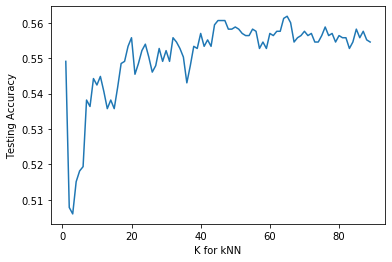

In [32]:
plt.plot(k_range, accuracy)
plt.xlabel('K for kNN')
plt.ylabel('Testing Accuracy')